<a href="https://colab.research.google.com/github/NedaAlyseen/covid/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

import io
import pandas as pd  
import seaborn 

from google.colab import files
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['country_wise_latest.csv']))
print(df2)

dataset=pd.read_csv('country_wise_latest.csv')
dataset.shape
dataset.describe()


Saving country_wise_latest.csv to country_wise_latest.csv
   Country/Region  Confirmed  ...  New recovered  1 week % increase
0       Australia      15303  ...            137              23.13
1          Brazil    2442375  ...          33728              15.28
2          Canada     116458  ...              0               3.13
3           China      86783  ...              7               1.36
4          Cyprus       1060  ...              0               2.12
5           Egypt      92482  ...           1007               4.62
6          France     220352  ...            267               2.96
7           India    1480073  ...          33598              28.11
8            Iran     293606  ...           1931               6.30
9            Iraq     112585  ...           1927              18.89
10          Italy     246286  ...            147               0.68
11          Japan      31142  ...            364              21.15
12         Jordan       1176  ...              0          

,Confirmed,Recovered,Active,New cases,New recovered,1 week % increase
count,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000
mean,3.080273e+05,2.183119e+05,75775.869565,3973.869565,3779.000000,10.541739
std,5.712818e+05,4.199946e+05,143275.673156,10077.468388,9609.214224,10.840999
min,6.740000e+02,0.000000e+00,124.000000,0.000000,0.000000,-3.840000
25%,2.322250e+04,8.956000e+03,3181.000000,150.000000,4.000000,2.625000
50%,1.095970e+05,7.714400e+04,12581.000000,594.000000,267.000000,5.210000
75%,2.593535e+05,2.045310e+05,73302.500000,2492.500000,1467.000000,19.620000
max,2.442375e+06,1.846641e+06,508116.000000,44457.000000,33728.000000,33.630000


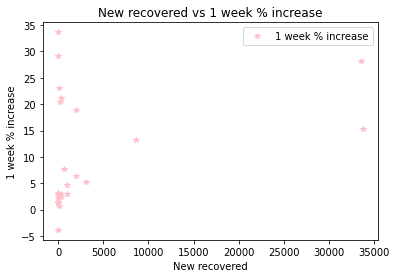

In [ ]:
dataset.plot(x='New recovered', y='1 week % increase',color= "pink",style="*")  
plt.title('New recovered vs 1 week % increase')  
plt.xlabel('New recovered')  
plt.ylabel('1 week % increase')  
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


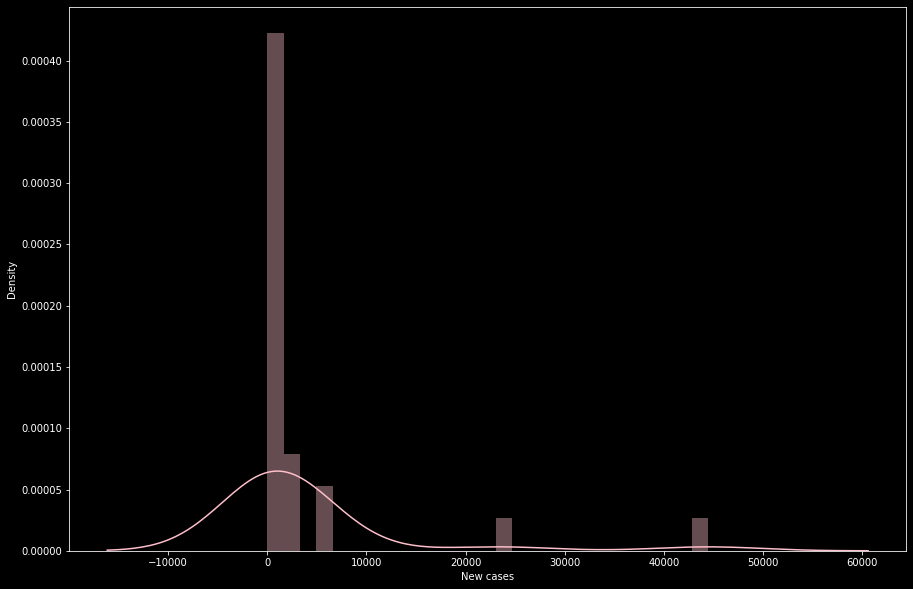

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.style.use("dark_background")
seabornInstance.distplot(dataset['New cases'], color="pink")



In [ ]:
X = dataset['New recovered'].values.reshape(-1,1)
y = dataset['1 week % increase'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

[7.19045317]
[[0.00063062]]


,Actual,Predicted
0,21.15,7.420000
1,0.68,7.283155
2,29.12,7.190453
3,33.63,7.201174
4,2.86,7.190453
5,15.28,28.460109
6,7.72,7.621799
7,2.92,7.809725
8,13.19,12.606244
9,6.30,8.408186


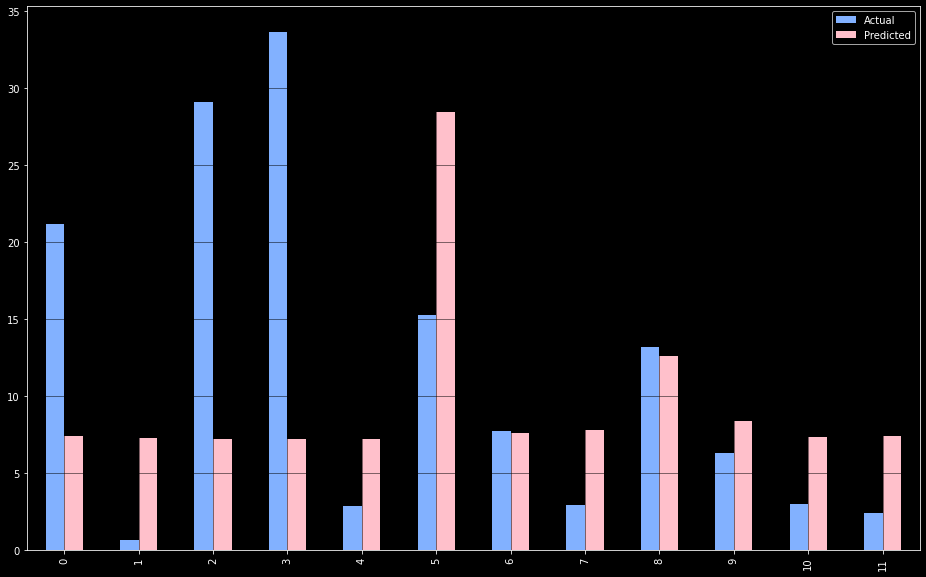

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10),color=('#82b1ff', 'pink'))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

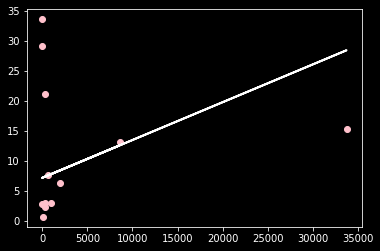

In [ ]:
plt.scatter(X_test, y_test,  color='pink')
plt.plot(X_test, y_pred, color='white', linewidth=2)
plt.show()

In [ ]:
print(dataset['Country/Region'].unique())

['Australia' 'Brazil' 'Canada' 'China' 'Cyprus' 'Egypt' 'France' 'India'
 'Iran' 'Iraq' 'Italy' 'Japan' 'Jordan' 'Kuwait' 'Lebanon' 'Malaysia'
 'Mexico' 'Qatar' 'Romania' 'Russia' 'Spain' 'Syria' 'Turkey']


In [ ]:
print(dataset.groupby('Country/Region').size())

Country/Region
Australia    1
Brazil       1
Canada       1
China        1
Cyprus       1
Egypt        1
France       1
India        1
Iran         1
Iraq         1
Italy        1
Japan        1
Jordan       1
Kuwait       1
Lebanon      1
Malaysia     1
Mexico       1
Qatar        1
Romania      1
Russia       1
Spain        1
Syria        1
Turkey       1
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


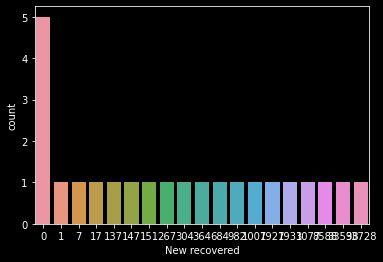

In [ ]:
import seaborn as sns
sns.countplot(dataset['New recovered'],label="Count")
plt.show()

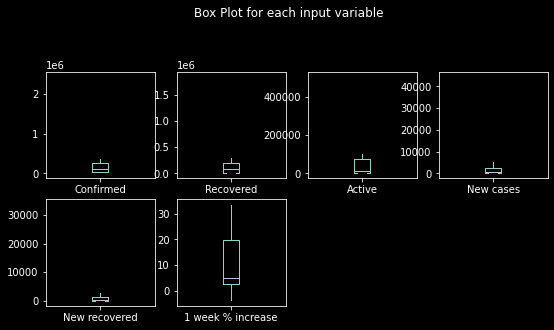

In [ ]:
dataset.drop('Country/Region', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(9,9),title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

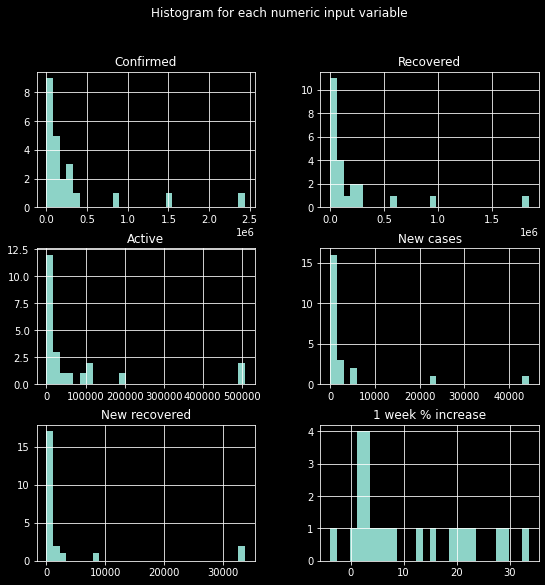

In [ ]:
import pylab as pl
dataset.drop('Country/Region' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('covid')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.18
Accuracy of Logistic regression classifier on test set: 0.00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.18
Accuracy of K-NN classifier on test set: 0.00


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 0.00


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.00


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

   Australia       0.00      0.00      0.00       0.0
      Brazil       0.00      0.00      0.00       1.0
       China       0.00      0.00      0.00       0.0
       India       0.00      0.00      0.00       0.0
       Italy       0.00      0.00      0.00       1.0
       Japan       0.00      0.00      0.00       1.0
     Lebanon       0.00      0.00      0.00       1.0
       Spain       0.00      0.00      0.00       1.0
       Syria       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1